In [1]:
from ase.io.trajectory import TrajectoryWriter as tw
from ase.io.trajectory import TrajectoryReader as tr

import os
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid.inset_locator import InsetPosition

from publish_format import useLargeSize

/var/folders/w1/x5tr4xcj5ts4lwh_vs3770sr0000gn/T/ipykernel_51074/2232719073.py:11: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import InsetPosition


In [2]:
color = {"DFT": "k",
         "AMPtorch DFT\n(with force)": "tab:orange",
         "AMPtorch DFT\n(without force)": "tab:blue",
         "AMPtorch DMC": "tab:red"}

markers = {"DFT": "x",
         "AMPtorch DFT\n(with force)": "o",
         "AMPtorch DFT\n(without force)": "^",
         "AMPtorch DMC": "d"}

In [3]:
def extract_forces(filename):
    forces = []
    trajs = tr(filename)
    for traj in trajs:
        forces.append(np.linalg.norm(np.array(traj.get_forces())))
    return np.array(forces)

def extract_geom(filename):
    '''
    "O H H"
    '''
    d_o_h1 = []
    d_o_h2 = []
    theta_h1_o_h2 = []
    
    trajs = tr(filename)
    for traj in trajs:
        d_o_h1.append(traj.get_distance(0, 1))
        d_o_h2.append(traj.get_distance(0, 2))
        theta_h1_o_h2.append(traj.get_angle(1,0,2))
      
    data = pd.DataFrame(
        {r"$d_{O-H_{1}}$": d_o_h1, 
         r"$d_{O-H_{2}}$": d_o_h2, 
         r"$\theta_{H_{1}-O-H_{2}}$": theta_h1_o_h2,
         }
    )
    return data

In [4]:
file = {}

file["DFT"] = "../geom_opt/dft/h2o_opt.traj"
file["AMPtorch DFT\n(with force)"] = "../geom_opt/amptorch_dft_force/h2o_opt.traj"
file["AMPtorch DFT\n(without force)"] = "../geom_opt/amptorch_dft_noforce/h2o_opt.traj"
file["AMPtorch DMC"] = "../geom_opt/amptorch_dmc/h2o_opt.traj"

In [5]:
# show the running time for each trajectories
for item in file:
    print(item, " has length ", len(tr(file[item])))
    print(tr(file[item])[0].get_positions())

DFT  has length  9
[[7.56318743 7.55       8.00018052]
 [6.53877433 7.55       7.19981948]
 [8.46122567 7.55       7.63735065]]
AMPtorch DFT
(with force)  has length  11
[[7.56318743 7.55       8.00018052]
 [6.53877433 7.55       7.19981948]
 [8.46122567 7.55       7.63735065]]
AMPtorch DFT
(without force)  has length  17
[[7.56318743 7.55       8.00018052]
 [6.53877433 7.55       7.19981948]
 [8.46122567 7.55       7.63735065]]
AMPtorch DMC  has length  9
[[7.56318743 7.55       8.00018052]
 [6.53877433 7.55       7.19981948]
 [8.46122567 7.55       7.63735065]]


In [6]:
for item in file:
    geom = extract_geom(file[item])
    print(item)
    print(geom)
    # print(geom.tail(1))

DFT
   $d_{O-H_{1}}$  $d_{O-H_{2}}$  $\theta_{H_{1}-O-H_{2}}$
0       1.300000       0.968565                120.000000
1       1.144440       1.024312                119.698930
2       0.821823       1.042215                119.401965
3       1.047210       0.993642                116.494628
4       1.003808       0.978941                114.107181
5       0.943800       0.962014                108.364146
6       0.960026       0.965966                107.411209
7       0.967327       0.967719                105.156050
8       0.967679       0.967353                104.310341
AMPtorch DFT
(with force)
    $d_{O-H_{1}}$  $d_{O-H_{2}}$  $\theta_{H_{1}-O-H_{2}}$
0        1.300000       0.968565                120.000000
1        1.155884       0.982723                120.956302
2        0.834415       0.967787                123.487351
3        1.051882       0.948686                118.826808
4        0.995934       0.957657                116.800783
5        0.934683       0.954857    

In [7]:
data = {}

for item in file:
    data[item] = extract_geom(file[item])

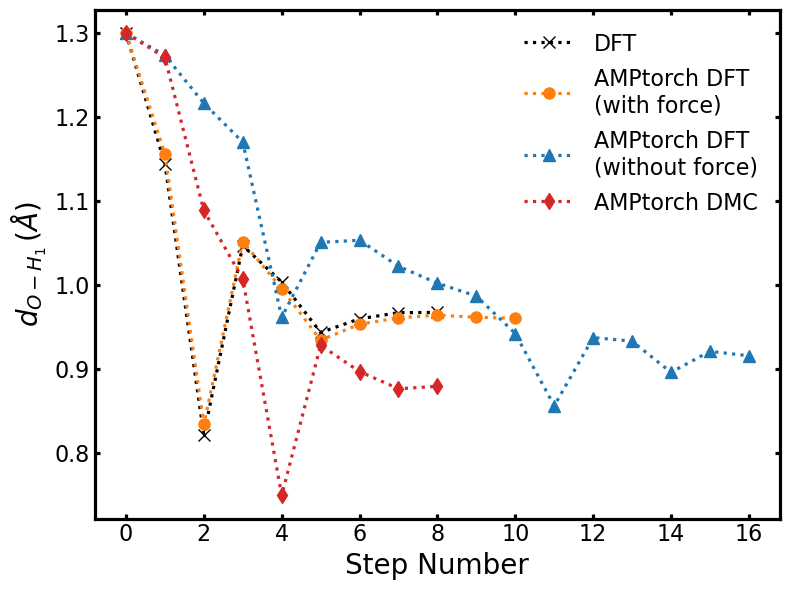

In [8]:
plot_data = {}
for item in file:
    plot_data[item] = data[item][r"$d_{O-H_{1}}$"]

figname = "h2o_opt_oh1.png"
xlabel = r"Step Number"
ylabel = r"$d_{O-H_1}\,({\AA})$"

plt.style.use('default')
fig, ax = plt.subplots(figsize=(8,6))

for item in plot_data:
    steps = np.arange(len(plot_data[item]))
    ax.plot(steps, 
            plot_data[item], 
            marker=markers[item], linestyle="dotted", markersize=8, 
            c=color[item], 
            label=item)

ax.set_xlabel(xlabel=xlabel)
ax.set_ylabel(ylabel=ylabel)
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
ax.legend(frameon=False, fontsize=18)
useLargeSize(plt, ax)
plt.savefig("./opt/{}".format(figname), dpi=300)

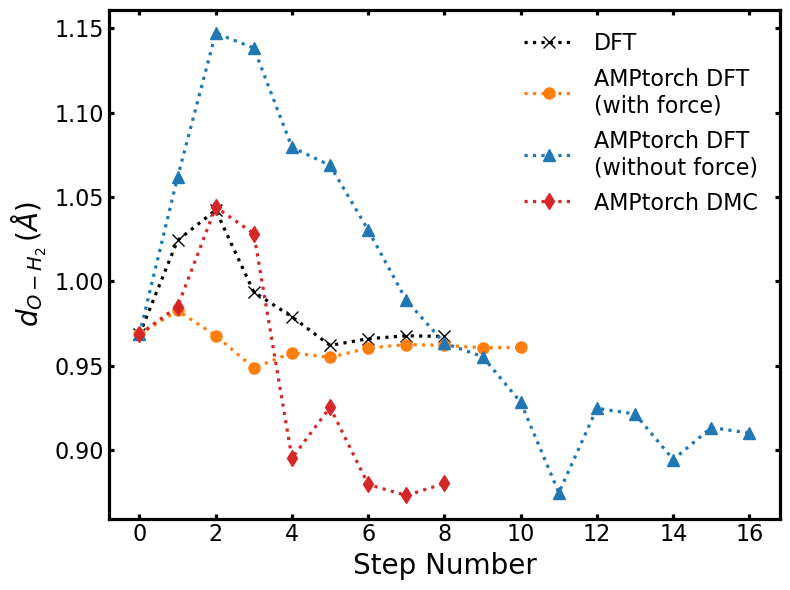

In [9]:
plot_data = {}
for item in file:
    plot_data[item] = data[item][r"$d_{O-H_{2}}$"]

figname = "h2o_opt_oh2.png"
xlabel = r"Step Number"
ylabel = r"$d_{O-H_2}\,({\AA})$"

plt.style.use('default')
fig, ax = plt.subplots(figsize=(8,6))

for item in plot_data:
    steps = np.arange(len(plot_data[item]))
    ax.plot(steps, 
            plot_data[item], 
            marker=markers[item], linestyle="dotted", markersize=8, 
            c=color[item], 
            label=item)

ax.set_xlabel(xlabel=xlabel)
ax.set_ylabel(ylabel=ylabel)
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
ax.legend(frameon=False, fontsize=18)
useLargeSize(plt, ax)
plt.savefig("./opt/{}".format(figname), dpi=300)

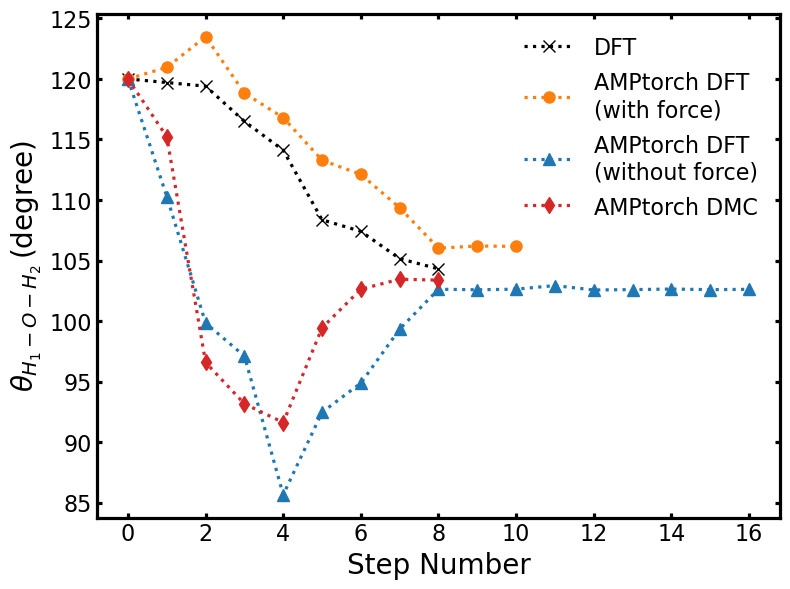

In [10]:
plot_data = {}
for item in file:
    plot_data[item] = data[item][r"$\theta_{H_{1}-O-H_{2}}$"]

figname = "h2o_opt_theta.png"
xlabel = r"Step Number"
ylabel = r"$\theta_{H_1-O-H_2}\,$(degree)"

plt.style.use('default')
fig, ax = plt.subplots(figsize=(8,6))

for item in plot_data:
    steps = np.arange(len(plot_data[item]))
    ax.plot(steps, 
            plot_data[item], 
            marker=markers[item], linestyle="dotted", markersize=8, 
            c=color[item], 
            label=item)

ax.set_xlabel(xlabel=xlabel)
ax.set_ylabel(ylabel=ylabel)
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
ax.legend(frameon=False, fontsize=18)
useLargeSize(plt, ax)
plt.savefig("./opt/{}".format(figname), dpi=300)